#   Sharks databe cleaning


Here is where I am going to try to clean all de data from the attack.csv downloaded from https://www.kaggle.com/teajay/global-shark-attacks/data

## First step. Import the dependencies. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Second. The path to the Data

In [2]:
df = pd.read_csv('../attacks.csv', encoding='latin-1')

# This code must be conveninetly addapted to each file need to use.

## The data: First impresion. Shape, Columns. Few rows. 

In [3]:


print(df.shape)
print(df.columns)
df.head()

# Note. This could be checked in directly in Kaggle. 

(25723, 24)
Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
for col, numnulls in df.isnull().sum().items():
    if numnulls > 0:
        print(f"{col} {numnulls}")

Case Number 17021
Date 19421
Year 19423
Type 19425
Country 19471
Area 19876
Location 19961
Activity 19965
Name 19631
Sex  19986
Age 22252
Injury 19449
Fatal (Y/N) 19960
Time 22775
Species  22259
Investigator or Source 19438
pdf 19421
href formula 19422
href 19421
Case Number.1 19421
Case Number.2 19421
original order 19414
Unnamed: 22 25722
Unnamed: 23 25721


## Drop off the duplicates

In [5]:
df = df.drop_duplicates()
# to know duplicates and drop them
#OJO se han quitado algunos duplicados y todoso los que estaban vacios, como 20.000)

In [6]:
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
for col, numnulls in df.isnull().sum().items():
    if numnulls > 0:
        print(f"{col} {numnulls}")
        
# Ojo, diferencia de los nulos arriba y aqui

Case Number 2
Date 10
Year 12
Type 14
Country 60
Area 465
Location 550
Activity 554
Name 220
Sex  575
Age 2841
Injury 38
Fatal (Y/N) 549
Time 3364
Species  2848
Investigator or Source 27
pdf 10
href formula 11
href 10
Case Number.1 10
Case Number.2 10
original order 3
Unnamed: 22 6311
Unnamed: 23 6310


## The function describe give us the first idea about the table

In [8]:
df.describe(include='all')


#This does not give us so much information because of the null and empty data inside. 

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
count,6310,6302,6300.000000,6298,6252,5847,5762,5758,6092,5737,...,3464,6285,6302,6301,6302,6302,6302,6309.000000,1,2
unique,6287,5433,NaN,8,212,825,4108,1532,5230,6,...,1549,4969,6291,6290,6285,6285,6286,NaN,1,2
top,0,1957,NaN,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,White shark,"C. Moore, GSAF",1921.11.27.a-b-Jack.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2013.10.05,1980.07.00,NaN,stopped here,Teramo
freq,8,11,NaN,4595,2229,1037,163,971,550,5094,...,163,105,2,2,4,2,2,NaN,1,1
mean,NaN,NaN,1927.272381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3155.999683,NaN,NaN
std,NaN,NaN,281.116308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1821.396206,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN
25%,NaN,NaN,1942.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1579.000000,NaN,NaN
50%,NaN,NaN,1977.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3156.000000,NaN,NaN
75%,NaN,NaN,2005.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4733.000000,NaN,NaN


In [9]:
df.describe().T
#(De los apuntes de Marc. No se que valores esta cogiendo)

,count,mean,std,min,25%,50%,75%,max
Year,6300.0,1927.272381,281.116308,0.0,1942.0,1977.0,2005.0,2018.0
original order,6309.0,3155.999683,1821.396206,2.0,1579.0,3156.0,4733.0,6310.0


## There are a few columns that seem to be empty or with non usefull data.
## Let's find them and get rid of them. 

In [10]:
df.isnull().sum().sort_values(ascending=False).head(20)

Unnamed: 22               6311
Unnamed: 23               6310
Time                      3364
Species                   2848
Age                       2841
Sex                        575
Activity                   554
Location                   550
Fatal (Y/N)                549
Area                       465
Name                       220
Country                     60
Injury                      38
Investigator or Source      27
Type                        14
Year                        12
href formula                11
pdf                         10
href                        10
Case Number.1               10
dtype: int64

In [11]:
print(df["Unnamed: 22"].value_counts())
print(df["Unnamed: 23"].value_counts())


stopped here    1
Name: Unnamed: 22, dtype: int64
Teramo             1
change filename    1
Name: Unnamed: 23, dtype: int64


## The last two columns are empty so we drop them

In [12]:
df = df.drop(columns=["Unnamed: 22", "Unnamed: 23"])
## df.drop(columns=['B', 'C'])

## There are some columns with data that is not usefull for our investigation, 
## so we are going to drop that columns as well.


In [13]:
df = df.drop(columns=["pdf", "Investigator or Source","href formula", "href","Date", "Type", "Area", "Name", "Age", "Case Number.2", "original order", "Case Number", "Location", "Case Number.1", "Time"])

In [14]:
df

,Year,Country,Activity,Sex,Injury,Fatal (Y/N),Species
0,2018.0,USA,Paddling,F,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,2018.0,USA,Standing,F,Minor injury to left thigh,N,NaN
2,2018.0,USA,Surfing,M,Injury to left lower leg from surfboard skeg,N,NaN
3,2018.0,AUSTRALIA,Surfing,M,Minor injury to lower leg,N,2 m shark
4,2018.0,MEXICO,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...
6307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
## We still have a lot of NaN values. 

In [16]:
# sacamos las filas con valores Country nulos
df[df.Country.isnull()]

,Year,Country,Activity,Sex,Injury,Fatal (Y/N),Species
62,2017.0,NaN,Surfing,M,Puncture wounds to feet,N,NaN
525,2014.0,NaN,Sea disaster,M,Shark involvement prior to death not confirmed,NaN,Shark involvement not confirmed
2956,1983.0,NaN,Swimming,M,Left leg bitten,N,NaN
3378,1970.0,NaN,NaN,M,Extensive injuries,N,NaN
3387,1970.0,NaN,Sea Disaster Sinking of ferryboat Christina,NaN,"Sharks scavenged on bodies, but no record of t...",NaN,Shark involvement prior to death was not confi...
3388,1970.0,NaN,NaN,M,Finger or toe severed,N,Mako shark
3395,1970.0,NaN,Freediving,M,Arm abraded & lacerated. Recorded as PROVOKED ...,N,Wobbegong shark
3399,1970.0,NaN,Wading,F,Lacerations to lower leg,N,Carpet shark
3425,1969.0,NaN,NaN,M,Am lacerated,N,NaN
3605,1965.0,NaN,The boat Caribou II sank,M,Survived,N,NaN


In [17]:
### OJO CON ESTA FUNCION Q ES LA HOSTIAAAAAAAAAAA
dfclean = df[~df.Country.isnull()]

In [18]:
dfclean

,Year,Country,Activity,Sex,Injury,Fatal (Y/N),Species
0,2018.0,USA,Paddling,F,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,2018.0,USA,Standing,F,Minor injury to left thigh,N,NaN
2,2018.0,USA,Surfing,M,Injury to left lower leg from surfboard skeg,N,NaN
3,2018.0,AUSTRALIA,Surfing,M,Minor injury to lower leg,N,2 m shark
4,2018.0,MEXICO,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...
6297,0.0,AUSTRALIA,Diving,M,FATAL,Y,NaN
6298,0.0,AUSTRALIA,Pearl diving,M,FATAL,Y,NaN
6299,0.0,USA,Swimming,M,FATAL,Y,NaN
6300,0.0,PANAMA,NaN,M,FATAL,Y,NaN


In [19]:
# This is not enough. Lets find more empty values

In [20]:
dfclean.isnull().sum().sort_values(ascending=False).head(20)

Species        2800
Sex             561
Activity        537
Fatal (Y/N)     534
Injury           26
Year              2
Country           0
dtype: int64

In [21]:
# I am going to do the same year and fatal. I will leave the rest because I am not sure if we could use them later.

In [22]:
dfclean = dfclean[~df.Year.isnull()]

/home/carlossanz/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [23]:
dfclean

,Year,Country,Activity,Sex,Injury,Fatal (Y/N),Species
0,2018.0,USA,Paddling,F,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,2018.0,USA,Standing,F,Minor injury to left thigh,N,NaN
2,2018.0,USA,Surfing,M,Injury to left lower leg from surfboard skeg,N,NaN
3,2018.0,AUSTRALIA,Surfing,M,Minor injury to lower leg,N,2 m shark
4,2018.0,MEXICO,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...
6297,0.0,AUSTRALIA,Diving,M,FATAL,Y,NaN
6298,0.0,AUSTRALIA,Pearl diving,M,FATAL,Y,NaN
6299,0.0,USA,Swimming,M,FATAL,Y,NaN
6300,0.0,PANAMA,NaN,M,FATAL,Y,NaN


In [24]:
dfclean.columns = ["year", "country", "activity", "sex", "injury", "fatal", "species"]  

In [25]:
dfclean 

,year,country,activity,sex,injury,fatal,species
0,2018.0,USA,Paddling,F,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,2018.0,USA,Standing,F,Minor injury to left thigh,N,NaN
2,2018.0,USA,Surfing,M,Injury to left lower leg from surfboard skeg,N,NaN
3,2018.0,AUSTRALIA,Surfing,M,Minor injury to lower leg,N,2 m shark
4,2018.0,MEXICO,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...
6297,0.0,AUSTRALIA,Diving,M,FATAL,Y,NaN
6298,0.0,AUSTRALIA,Pearl diving,M,FATAL,Y,NaN
6299,0.0,USA,Swimming,M,FATAL,Y,NaN
6300,0.0,PANAMA,NaN,M,FATAL,Y,NaN


In [26]:
dfclean = dfclean[~dfclean.fatal.isnull()]
dfclean

,year,country,activity,sex,injury,fatal,species
0,2018.0,USA,Paddling,F,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,2018.0,USA,Standing,F,Minor injury to left thigh,N,NaN
2,2018.0,USA,Surfing,M,Injury to left lower leg from surfboard skeg,N,NaN
3,2018.0,AUSTRALIA,Surfing,M,Minor injury to lower leg,N,2 m shark
4,2018.0,MEXICO,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...
6297,0.0,AUSTRALIA,Diving,M,FATAL,Y,NaN
6298,0.0,AUSTRALIA,Pearl diving,M,FATAL,Y,NaN
6299,0.0,USA,Swimming,M,FATAL,Y,NaN
6300,0.0,PANAMA,NaN,M,FATAL,Y,NaN


In [27]:
## Dont think we have data about year 0 so lets drop them
dfclean = dfclean[dfclean.year != 0.0]

In [28]:
## not interested in data before 1920 
dfclean = dfclean[dfclean.year > 1920.0]

In [29]:
dfclean

,year,country,activity,sex,injury,fatal,species
0,2018.0,USA,Paddling,F,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,2018.0,USA,Standing,F,Minor injury to left thigh,N,NaN
2,2018.0,USA,Surfing,M,Injury to left lower leg from surfboard skeg,N,NaN
3,2018.0,AUSTRALIA,Surfing,M,Minor injury to lower leg,N,2 m shark
4,2018.0,MEXICO,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...
5242,1921.0,ENGLAND,Fishing,M,Leg bitten by shark he was attempting to captu...,N,"Blue shark, 4'"
5243,1921.0,AUSTRALIA,NaN,M,Lacerations to arm,N,NaN
5244,1921.0,PHILIPPINES,Swimming,M,"FATAL, abdomen severely lacerated, taken by s...",Y,NaN
5245,1921.0,CUBA,Fell overboard,M,FATAL,Y,NaN


## Now the table shows 4801 rows × 7 columns. Sharks attacks during the last century.

In [ ]:
# Now we can have another look about what we have

In [31]:
dfclean.activity.unique()[:20]

array(['Paddling', 'Standing', 'Surfing', 'Free diving', 'Kite surfing',
       'Swimming', 'Fishing', 'Walking', 'Feeding sharks',
       'Boogie boarding', 'Scuba diving', 'Paddle-skiing',
       'Body boarding', 'Windsurfing', 'Stand-Up Paddleboarding',
       'Wading', 'Scuba Diving', 'Kayak fishing for sharks',
       'Cleaning fish', 'Snorkeling'], dtype=object)

In [32]:
dfclean.describe(include='all')

,year,country,activity,sex,injury,fatal,species
count,4801.000000,4801,4490,4374,4788,4801,2766
unique,NaN,162,1135,5,2974,6,1427
top,NaN,USA,Surfing,M,FATAL,N,White shark
freq,NaN,1832,928,3845,420,3862,152
mean,1983.135805,NaN,NaN,NaN,NaN,NaN,NaN
std,27.334363,NaN,NaN,NaN,NaN,NaN,NaN
min,1921.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1961.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1991.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:


# Ordena las columnas alfabéticamente
#df = df[sorted(df.columns)]
#df


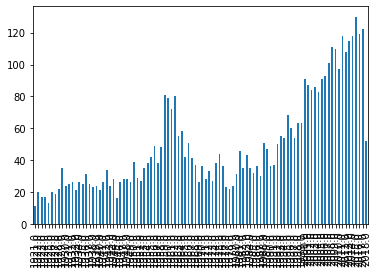

In [33]:


%matplotlib inline
dfclean.year.value_counts().sort_index().plot.bar()



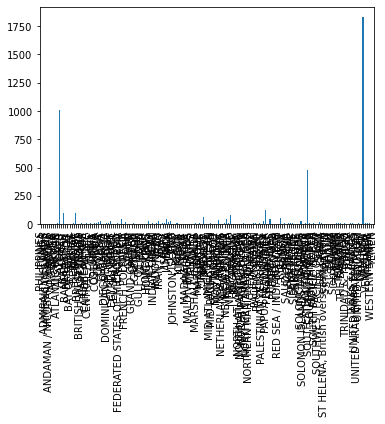

In [34]:
%matplotlib inline
dfclean.country.value_counts().sort_index().plot.bar()

In [36]:
# Miramos que valores hay en anos
dfclean.year.value_counts()

2015.0    130
2017.0    122
2016.0    119
2011.0    118
2014.0    118
         ... 
1923.0     17
1924.0     17
1945.0     16
1925.0     13
1921.0     11
Name: year, Length: 98, dtype: int64

In [37]:
dfclean

,year,country,activity,sex,injury,fatal,species
0,2018.0,USA,Paddling,F,"No injury to occupant, outrigger canoe and pad...",N,White shark
1,2018.0,USA,Standing,F,Minor injury to left thigh,N,NaN
2,2018.0,USA,Surfing,M,Injury to left lower leg from surfboard skeg,N,NaN
3,2018.0,AUSTRALIA,Surfing,M,Minor injury to lower leg,N,2 m shark
4,2018.0,MEXICO,Free diving,M,Lacerations to leg & hand shark PROVOKED INCIDENT,N,"Tiger shark, 3m"
...,...,...,...,...,...,...,...
5242,1921.0,ENGLAND,Fishing,M,Leg bitten by shark he was attempting to captu...,N,"Blue shark, 4'"
5243,1921.0,AUSTRALIA,NaN,M,Lacerations to arm,N,NaN
5244,1921.0,PHILIPPINES,Swimming,M,"FATAL, abdomen severely lacerated, taken by s...",Y,NaN
5245,1921.0,CUBA,Fell overboard,M,FATAL,Y,NaN
